In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("all_23_solenoids.csv")

In [4]:
data.head()

,x,y,z,bx,by,bz,particle,energy,volume
0,-56.085381,5.547196,2630.0,-0.513668,-0.050558,5.132530,pi-,582.423536,Solenoid_1_FieldVolume
1,19.058727,73.730301,6610.0,0.058184,0.056333,1.710843,pi-,581.771293,Solenoid_1_FieldVolume
2,-322.437380,-56.689492,10445.5,-0.984366,0.170452,1.710843,pi-,580.938507,Solenoid_1_FieldVolume
3,95.197196,-54.285152,14840.0,0.145417,-0.072034,0.855422,pi-,580.286537,Solenoid_1_FieldVolume
4,12.826372,-8.803242,80.0,0.254706,-0.144132,11.120481,pi+,332.221239,Solenoid_1_FieldVolume


In [5]:
z = np.array(data['z'].to_list())
bz = np.array(data['bz'].to_list())
particles = np.array(data['particle'].to_list())
energy = np.array(data['energy'].to_list())
print(len(z))

272313


In [6]:
pi_plus_pos = []
pi_plus_energy = []
pi_minus = []
mu_plus = []
mu_minus = []
for i in range(0, len(particles)):
    if particles[i] == "pi+":
        pi_plus_energy.append(energy[i])
        pi_plus_pos.append(z[i])

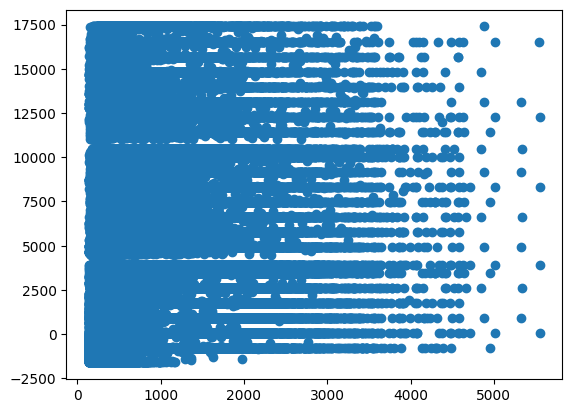

In [7]:
plt.scatter(pi_plus_energy, pi_plus_pos)
plt.show()

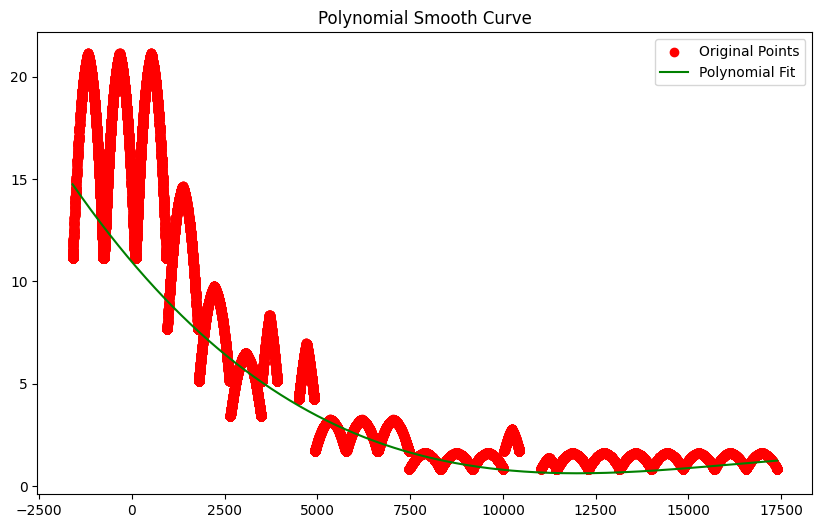

In [8]:
coefficients = np.polyfit(z, bz, 3)
polynomial = np.poly1d(coefficients)

# Generate smooth curve
z_smooth = np.linspace(z.min(), z.max(), 3000)
bz_smooth = polynomial(z_smooth)

plt.figure(figsize=(10, 6))
plt.scatter(z, bz, color='red', label='Original Points')
plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.legend()
plt.title('Polynomial Smooth Curve')
plt.show()

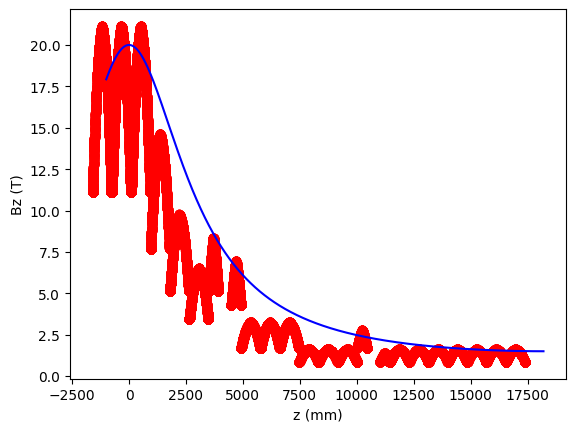

In [9]:
Bi = 20
Bf = 1.5
Lt = 18200
# -1< z < Lt
B = []

z_list = [i for i in range(-1000, 18201)] 

for zi in z_list:
    B_temp = (Bi*Bf*(Lt**3))/(Bi*(zi**2)*(3*Lt-2*zi)+Bf*((Lt-zi)**2)*(2*zi+Lt))
    B.append(B_temp)
    
plt.plot(z_list, B, color='blue', label='Original Points')
plt.scatter(z,bz, color='red', label='Expected plot')
plt.xlabel('z (mm)')
plt.ylabel('Bz (T)')
#plt.plot(z_smooth, bz_smooth, 'g-', label='Polynomial Fit')
plt.show()

In [10]:
data = pd.read_csv("6D_vector.csv")
data.head()

,Detector,ParticleType,x[cm],px[MeV/c],y[cm],py[MeV/c],z[cm],pz[MeV/c],TotalEnergy[MeV]
0,1,pi-,-9.30234,-63.1664,8.39563,-31.901000,399.95,560.635,582.065
1,2,pi-,-31.86540,39.1347,-6.15788,-50.654100,1049.95,560.175,580.839
2,3,pi-,-13.30950,-80.6621,15.82820,-0.217535,1749.95,556.794,579.660
3,1,pi+,4.27360,31.2905,2.04341,-6.349090,399.95,298.921,331.441
4,2,pi+,21.03070,-27.4265,4.96020,-18.056300,1049.95,297.313,330.080


In [11]:
det = np.array(data['Detector'].to_list())
particle = np.array(data['ParticleType'].to_list())
px = np.array(data['px[MeV/c]'].to_list())
py = np.array(data['py[MeV/c]'].to_list())
pz = np.array(data['pz[MeV/c]'].to_list())
x = np.array(data['x[cm]'].to_list())
y = np.array(data['y[cm]'].to_list())
z = np.array(data['z[cm]'].to_list())
det1_particles = []
det1_px = []
det1_py = []
det1_pz = []
det1_x = []
det1_y = []
det1_z = []
det2_particles = []
det2_px = []
det2_py = []
det2_pz = []
det2_x = []
det2_y = []
det2_z = []
det3_particles = []
det3_px = []
det3_py = []
det3_pz = []
det3_x = []
det3_y = []
det3_z = []

In [12]:
for i in range(0, len(det)):
    if det[i] == 1:
        det1_particles.append(particle[i])
        det1_px.append(px[i])
        det1_py.append(py[i])
        det1_pz.append(pz[i])
        det1_x.append(x[i])
        det1_y.append(y[i])
        det1_z.append(z[i])
    elif det[i] == 2:
        det2_particles.append(particle[i])
        det2_px.append(px[i])
        det2_py.append(py[i])
        det2_pz.append(pz[i])
        det2_x.append(x[i])
        det2_y.append(y[i])
        det2_z.append(z[i])
    elif det[i] == 3:
        det3_particles.append(particle[i])
        det3_px.append(px[i])
        det3_py.append(py[i])
        det3_pz.append(pz[i])
        det3_x.append(x[i])
        det3_y.append(y[i])
        det3_z.append(z[i])

len(det3_particles)

22927

In [13]:
from collections import Counter

counts = Counter(det1_particles)
categories = list(counts.keys())
values = list(counts.values())

print(categories)
print(values)
pi_minus_count = []
pi_minus_count.append(values[0])
pi_plus_count = []
pi_plus_count.append(values[1])
mu_plus_count = []
mu_plus_count.append(values[2])
mu_minus_count = []
mu_minus_count.append(values[3])

['pi-', 'pi+', 'mu+', 'mu-']
[22979, 29871, 10932, 8471]


In [14]:
counts = Counter(det2_particles)
categories = list(counts.keys())
values = list(counts.values())

pi_minus_count.append(values[0])
pi_plus_count.append(values[1])
mu_plus_count.append(values[2])
mu_minus_count.append(values[3])

In [15]:
counts = Counter(det3_particles)
categories = list(counts.keys())
values = list(counts.values())

pi_minus_count.append(values[0])
pi_plus_count.append(values[1])
mu_plus_count.append(values[2])
mu_minus_count.append(values[3])

In [17]:
 len(det3_particles)/50000

0.45854

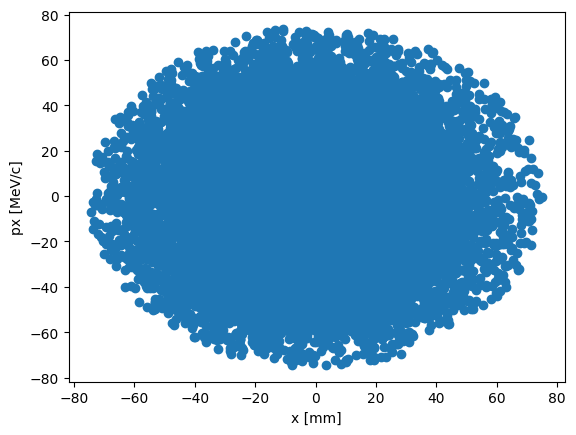

In [18]:
plt.scatter(det1_x,det1_y )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()

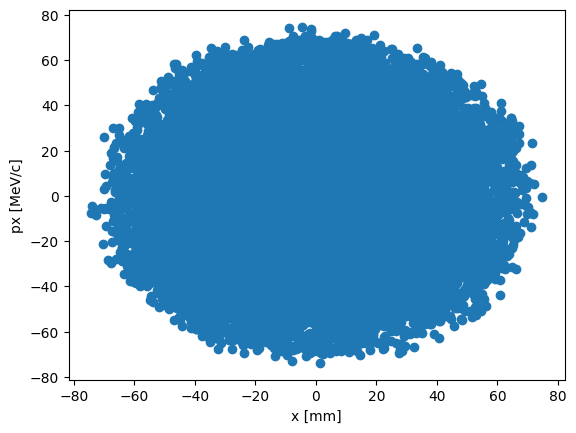

In [19]:
plt.scatter(det3_x,det3_y )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()

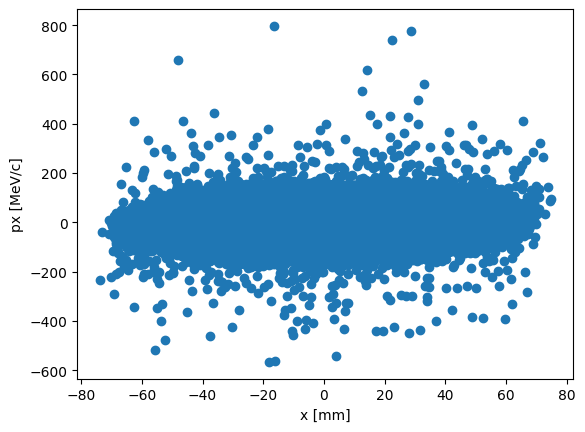

In [20]:
plt.scatter(det3_y,det3_py )
plt.xlabel("x [mm]")
plt.ylabel("px [MeV/c]")
plt.show()

In [21]:
def compute_and_plot_emittance(x_list, px_list, pz_list):
    # Convert lists to numpy arrays
    x = np.array(x_list)
    px = np.array(px_list)
    pz = np.array(pz_list)
    
    # Compute x' = px / pz
    xp = px / pz

    # Center data
    x_mean = np.mean(x)
    xp_mean = np.mean(xp)
    x_c = x - x_mean
    xp_c = xp - xp_mean

    # Compute statistical moments
    x2 = np.mean(x_c**2)
    xp2 = np.mean(xp_c**2)
    xxp = np.mean(x_c * xp_c)

    # Calculate geometric emittance
    emittance = np.sqrt(x2 * xp2 - xxp**2)
    print(f"Geometric Emittance: {emittance:.3e} m·rad")

    # Plotting phase space
    
    plt.scatter(x, xp*1e3, s=2, alpha=0.5)
    plt.xlabel("x [mm]")
    plt.ylabel("x' [mrad]")
    plt.title("Transverse Phase Space (x vs x')")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return emittance

Geometric Emittance: 9.284e+00 m·rad


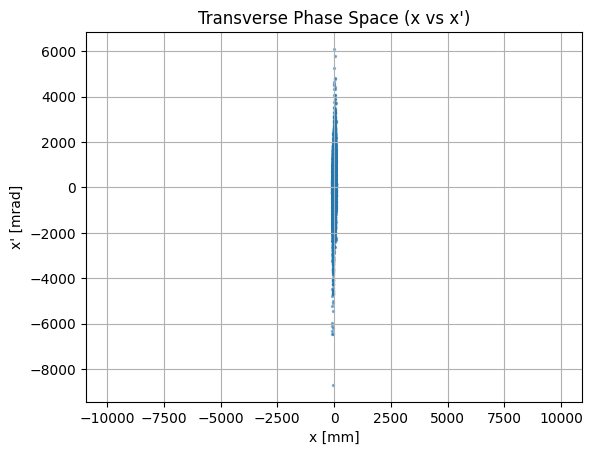

9.284114336154351

In [22]:
compute_and_plot_emittance(det1_x, det1_px, det1_pz)

Geometric Emittance: 5.402e+00 m·rad


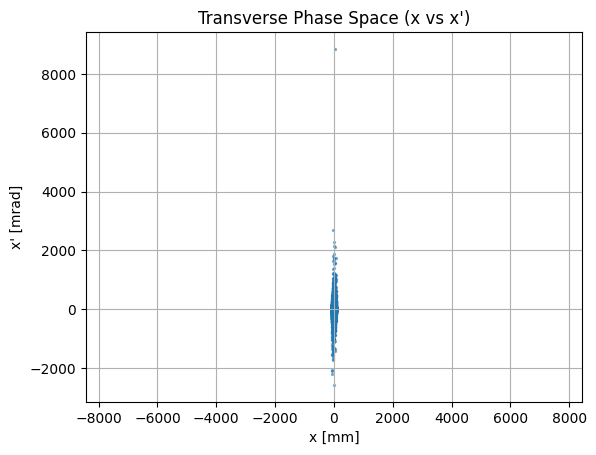

5.401791642436961

In [23]:
compute_and_plot_emittance(det3_x, det3_px, det3_pz)

In [24]:
det_pos = [4, 10.5, 17.5] # in meters

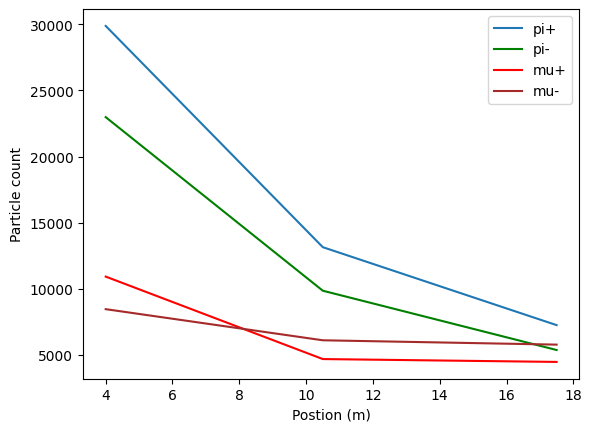

In [25]:
plt.plot(det_pos, pi_plus_count, label='pi+')
plt.plot(det_pos, pi_minus_count, color="green", label="pi-")
plt.plot(det_pos, mu_plus_count, color="red", label='mu+')
plt.plot(det_pos, mu_minus_count, color="brown", label='mu-')
plt.legend()
plt.xlabel("Postion (m)")
plt.ylabel("Particle count")
plt.show()